In [14]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import quantstats as qs

## 전체기간

In [67]:
# 코덱스 불러오기
kodex = fdr.DataReader("069500","20130228","20221231")
kodex = pd.DataFrame(kodex['Close'].pct_change())
kodex.columns = ['kodex']

# 코덱스 채권 불러오기
kodex_bond = fdr.DataReader("152380","20130228","20221231")
kodex_bond = pd.DataFrame(kodex_bond['Close'].pct_change())
kodex_bond.columns = ['kodex_bond']

In [68]:
## 데이터 합치기
data = pd.concat([kodex, kodex_bond], axis=1)
data = data.dropna(axis=0)
data

,kodex,kodex_bond
Date,,
2013-03-04,-0.008693,0.000000
2013-03-05,0.003044,-0.000452
2013-03-06,-0.000453,0.000362
2013-03-07,-0.007840,-0.003704
2013-03-08,-0.000548,0.000635
...,...,...
2022-12-23,-0.017249,-0.005668
2022-12-26,0.001525,-0.006334
2022-12-27,0.007105,0.001434


In [69]:
## 수익률 칼럼 만들기
data['6040_return'] = data['kodex']*0.6 + data['kodex_bond']*0.4
data['4060_return'] = data['kodex_bond']*0.6 + data['kodex']*0.4
data

,kodex,kodex_bond,6040_return,4060_return
Date,,,,
2013-03-04,-0.008693,0.000000,-0.005216,-0.003477
2013-03-05,0.003044,-0.000452,0.001646,0.000947
2013-03-06,-0.000453,0.000362,-0.000127,0.000036
2013-03-07,-0.007840,-0.003704,-0.006186,-0.005359
2013-03-08,-0.000548,0.000635,-0.000075,0.000162
...,...,...,...,...
2022-12-23,-0.017249,-0.005668,-0.012617,-0.010301
2022-12-26,0.001525,-0.006334,-0.001619,-0.003191
2022-12-27,0.007105,0.001434,0.004837,0.003702


In [70]:
### 기간 설정

# 확장국면 기간 (0)
to1_start = '2013-04-01'
to1_end = '2015-04-30'
# 수축국면 기간 (1)
to2_start = '2015-05-01'
to2_end = '2016-01-31'
# 확장국면 기간 (0)
to3_start = '2016-02-01'
to3_end = '2017-04-30'
# 수축국면 기간 (1)
to4_start = '2017-05-01'
to4_end = '2019-09-30'
# 확장국면 기간 (0)
to5_start = '2019-10-01'
to5_end = '2021-05-31'
# 수축국면 기간 (1)
to6_start = '2021-06-01'
to6_end = '2022-12-31'

In [71]:
to1 = data.loc[to1_start:to1_end, '6040_return']
to2 = data.loc[to2_start:to2_end, '4060_return']
to3 = data.loc[to3_start:to3_end, '6040_return']
to4 = data.loc[to4_start:to4_end, '4060_return']
to5 = data.loc[to5_start:to5_end, '6040_return']
to6 = data.loc[to6_start:to6_end, '4060_return']

In [72]:
# 두 데이터 시리즈를 합치기
total = pd.concat([to1,to2, to3, to4, to5, to6])
total

Date
2013-04-01   -0.002242
2013-04-02   -0.005143
2013-04-03   -0.000765
2013-04-04   -0.007552
2013-04-05   -0.008573
                ...   
2022-12-23   -0.010301
2022-12-26   -0.003191
2022-12-27    0.003702
2022-12-28   -0.007929
2022-12-29   -0.009950
Length: 2400, dtype: float64

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the 

                           Strategy
-------------------------  ----------
Start Period               2013-04-01
End Period                 2022-12-29
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          41.48%
CAGR﹪                     2.49%

Sharpe                     0.45
Prob. Sharpe Ratio         91.76%
Smart Sharpe               0.43
Sortino                    0.64
Smart Sortino              0.62
Sortino/√2                 0.45
Smart Sortino/√2           0.44
Omega                      1.09

Max Drawdown               -23.77%
Longest DD Days            520
Volatility (ann.)          9.0%
Calmar                     0.1
Skew                       0.14
Kurtosis                   13.07

Expected Daily %           0.01%
Expected Monthly %         0.3%
Expected Yearly %          3.53%
Kelly Criterion            4.26%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.92%
Expected Shortfall (cVaR)  -0.92%

Max Consecutive Wins       10


None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-08-05,2022-10-21,2022-12-29,512,-23.774326,-22.930196
2,2020-01-23,2020-03-19,2020-07-20,180,-22.189783,-18.470010
3,2013-04-02,2013-06-26,2013-10-14,196,-8.998232,-8.730176
4,2015-04-24,2015-08-24,2016-03-16,328,-7.064314,-6.409797
5,2017-11-06,2018-11-01,2019-04-09,520,-6.434911,-6.206675


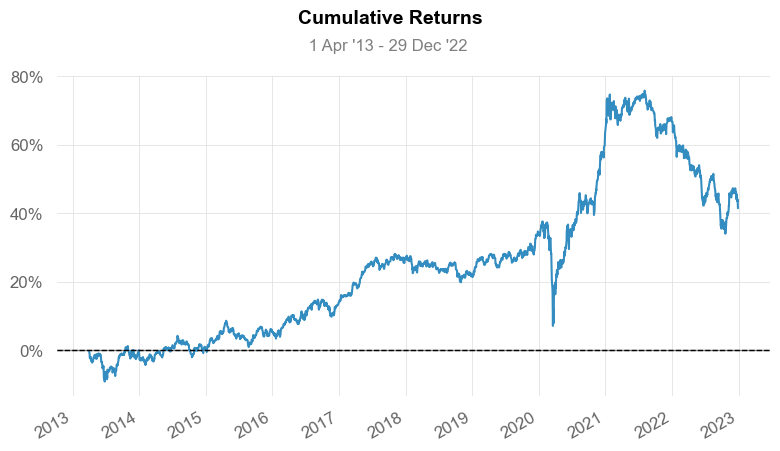

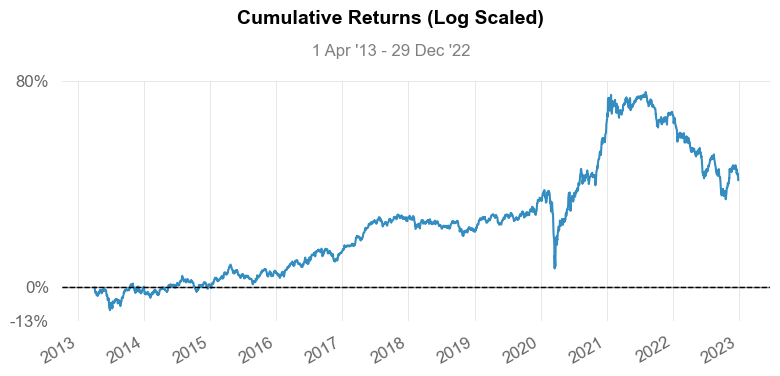

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\quantstats\_plotting\wrappers.py:565: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").apply(_stats.comp)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\quantstats\_plotting\wrappers.py:568: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").last()


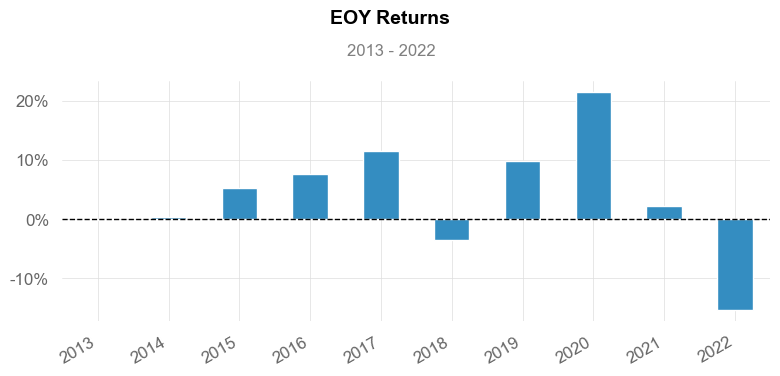

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\quantstats\_plotting\core.py:440: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  returns.fillna(0).resample(resample).apply(apply_fnc).resample(resample).last()


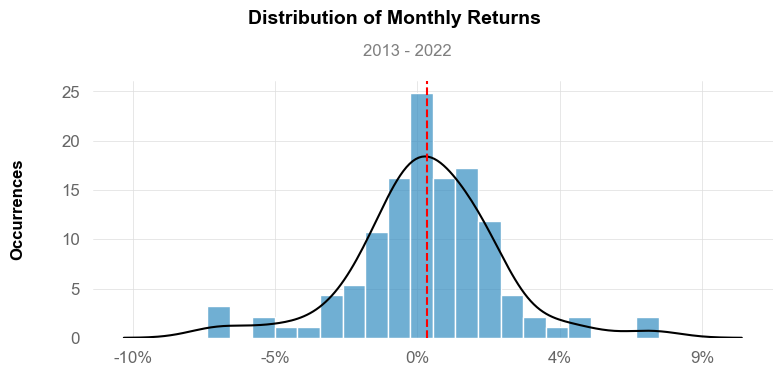

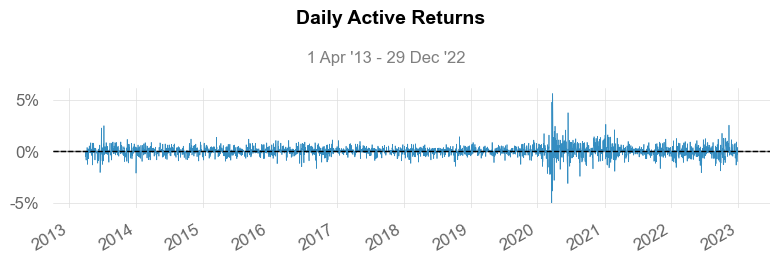

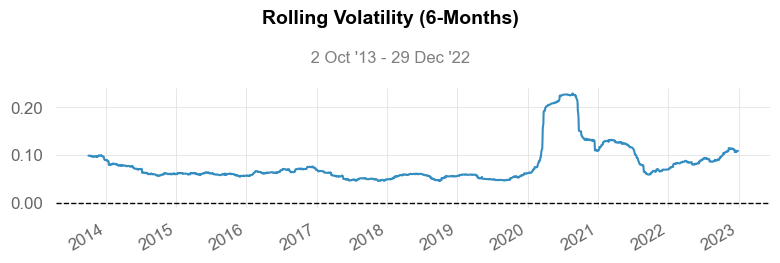

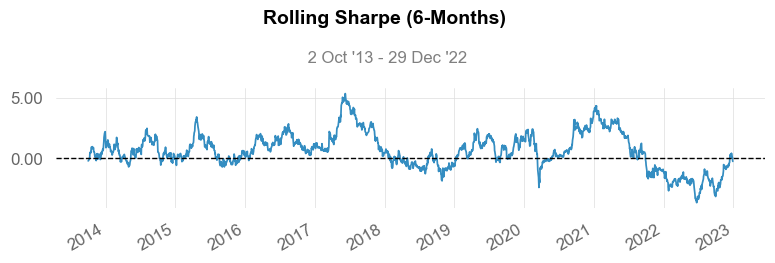

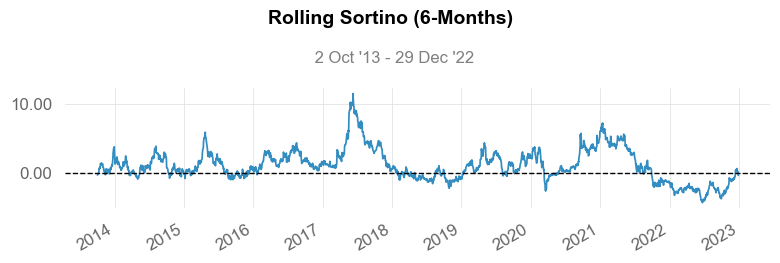

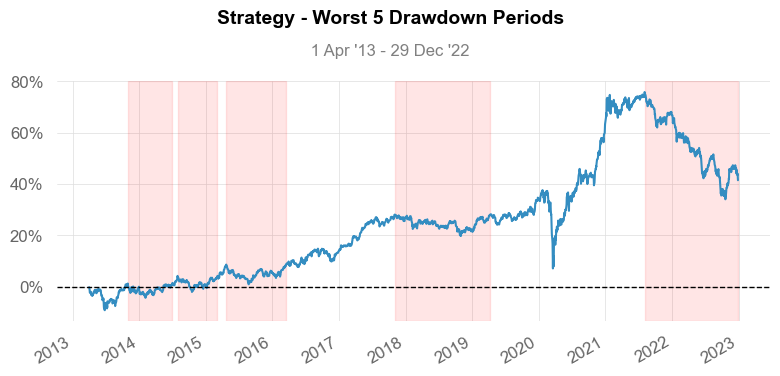

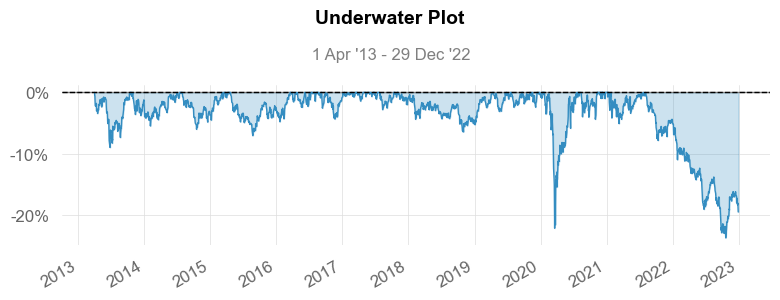

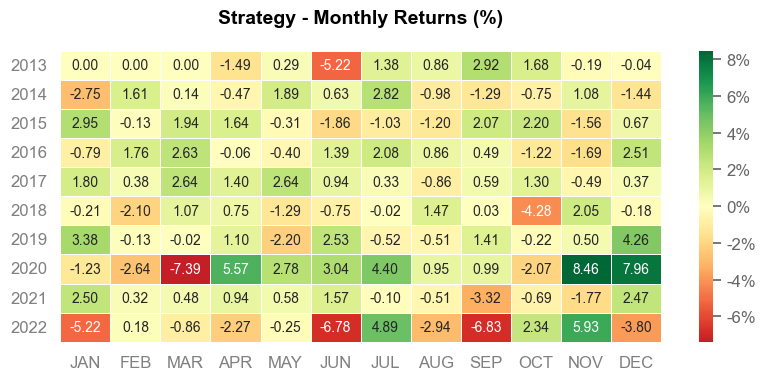

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\quantstats\_plotting\core.py:1016: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  port["Weekly"].ffill(inplace=True)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\quantstats\_plotting\core.py:1018: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  port["Monthly"] = port["Daily"].resample("M").apply(apply_fnc)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-package

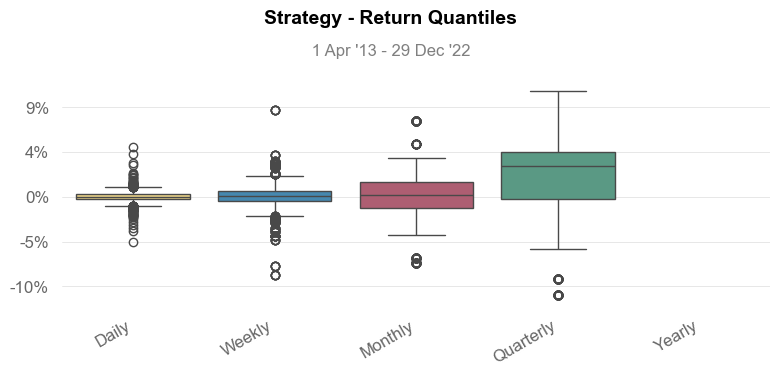

In [73]:
qs.reports.full(total, mode = 'basic')

## 정상 기간 (13년 ~ 19년)

In [74]:
### 기간 설정

# 확장국면 기간 (0)
no1_start = '2013-04-01'
no1_end = '2015-04-30'
# 수축국면 기간 (1)
no2_start = '2015-05-01'
no2_end = '2016-01-31'
# 확장국면 기간 (0)
no3_start = '2016-02-01'
no3_end = '2017-04-30'
# 수축국면 기간 (1)
no4_start = '2017-05-01'
no4_end = '2019-09-30'
# 확장국면 기간 (0)
no5_start = '2019-10-01'
no5_end = '2019-12-31'

In [75]:
no1 = data.loc[no1_start:no1_end, '6040_return']
no2 = data.loc[no2_start:no2_end, '4060_return']
no3 = data.loc[no3_start:no3_end, '6040_return']
no4 = data.loc[no4_start:no4_end, '4060_return']
no5 = data.loc[no5_start:no5_end, '6040_return']

In [76]:
# 두 데이터 시리즈를 합치기
normal = pd.concat([no1,no2, no3, no4, no5])
normal

Date
2013-04-01   -0.002242
2013-04-02   -0.005143
2013-04-03   -0.000765
2013-04-04   -0.007552
2013-04-05   -0.008573
                ...   
2019-12-23    0.001098
2019-12-24   -0.003130
2019-12-26    0.002298
2019-12-27    0.007687
2019-12-30   -0.002047
Length: 1658, dtype: float64

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the 

                           Strategy
-------------------------  ----------
Start Period               2013-04-01
End Period                 2019-12-30
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          34.4%
CAGR﹪                     3.07%

Sharpe                     0.73
Prob. Sharpe Ratio         96.96%
Smart Sharpe               0.7
Sortino                    1.05
Smart Sortino              1.0
Sortino/√2                 0.74
Smart Sortino/√2           0.71
Omega                      1.13

Max Drawdown               -9.0%
Longest DD Days            520
Volatility (ann.)          6.39%
Calmar                     0.34
Skew                       -0.18
Kurtosis                   2.85

Expected Daily %           0.02%
Expected Monthly %         0.37%
Expected Yearly %          4.31%
Kelly Criterion            6.32%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.64%
Expected Shortfall (cVaR)  -0.64%

Max Consecutive Wins       10
Ma

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2013-04-02,2013-06-26,2013-10-14,196,-8.998232,-8.730176
2,2015-04-24,2015-08-24,2016-03-16,328,-7.064314,-6.409797
3,2017-11-06,2018-11-01,2019-04-09,520,-6.434911,-6.206675
4,2014-07-31,2014-10-17,2015-03-05,218,-6.019424,-5.403676
5,2013-10-31,2014-02-04,2014-07-01,244,-5.484417,-4.850061


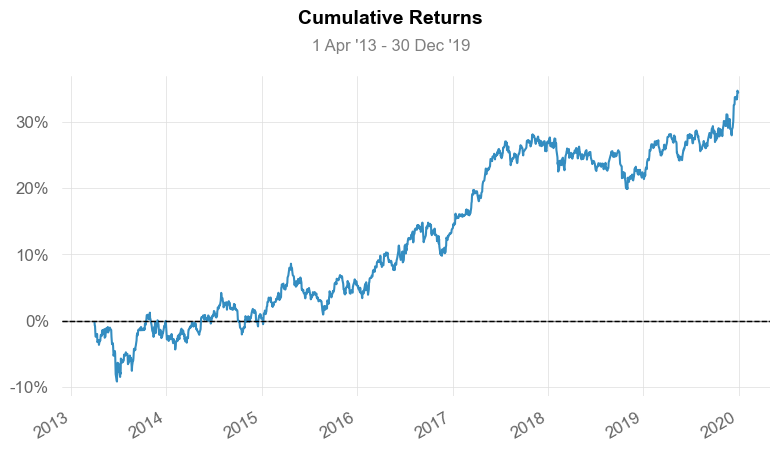

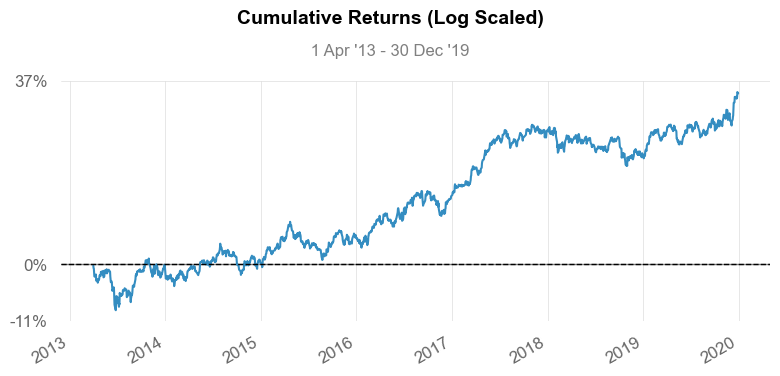

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\quantstats\_plotting\wrappers.py:565: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").apply(_stats.comp)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\quantstats\_plotting\wrappers.py:568: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").last()


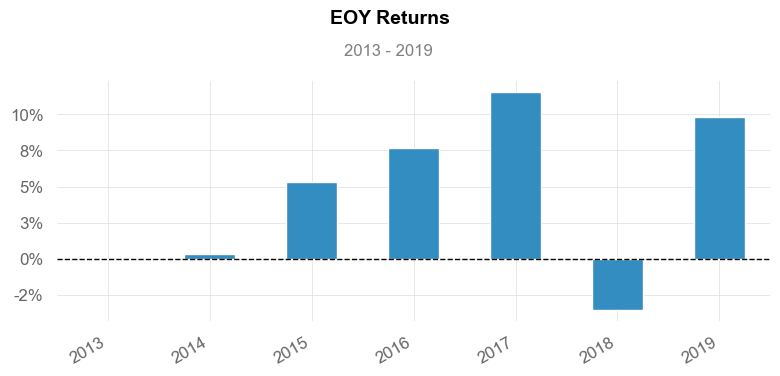

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\quantstats\_plotting\core.py:440: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  returns.fillna(0).resample(resample).apply(apply_fnc).resample(resample).last()


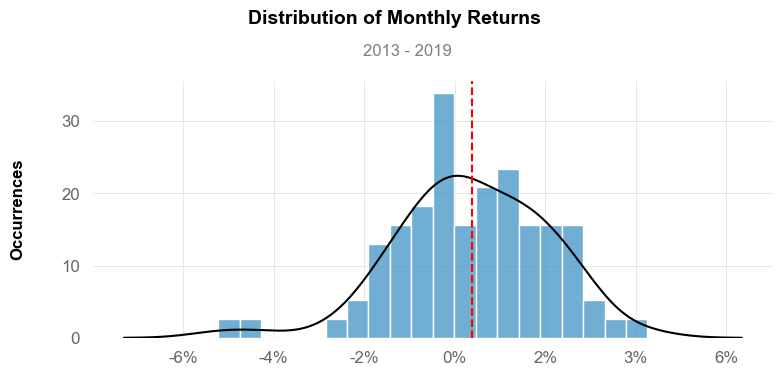

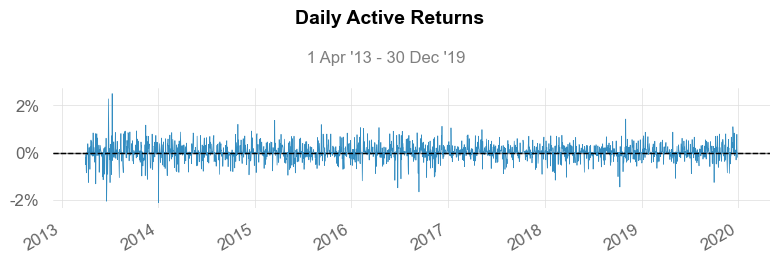

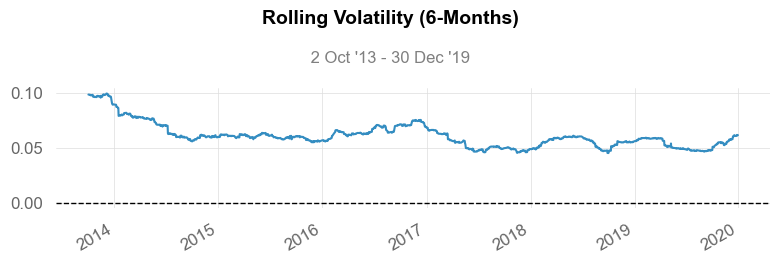

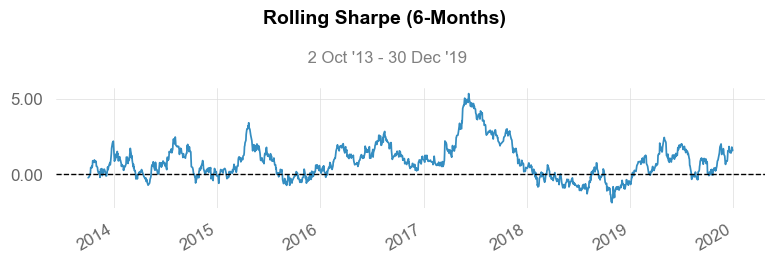

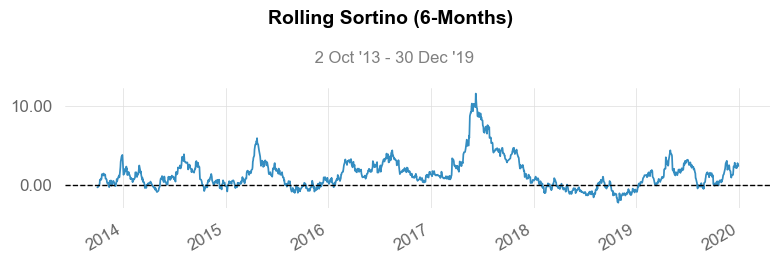

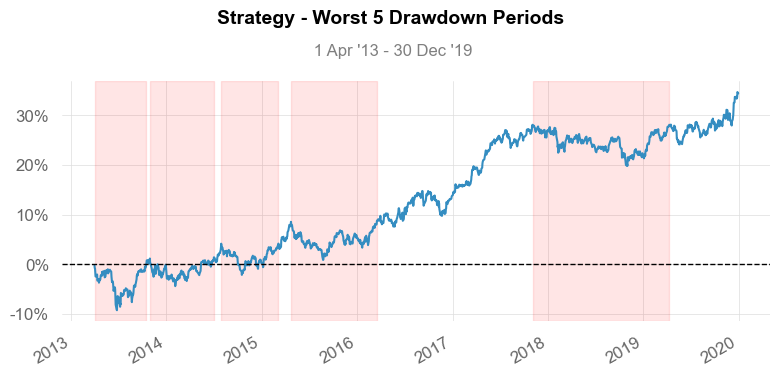

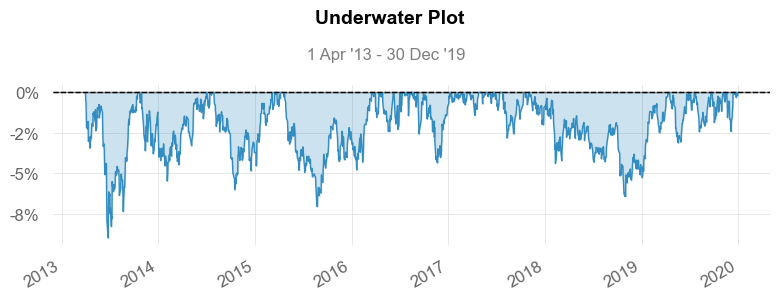

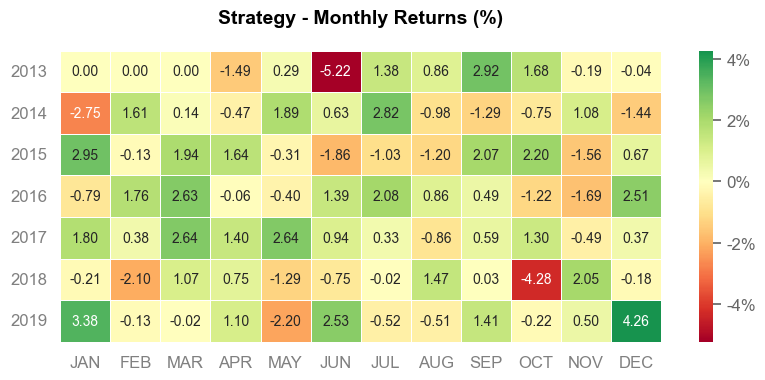

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\quantstats\_plotting\core.py:1016: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  port["Weekly"].ffill(inplace=True)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\quantstats\_plotting\core.py:1018: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  port["Monthly"] = port["Daily"].resample("M").apply(apply_fnc)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-package

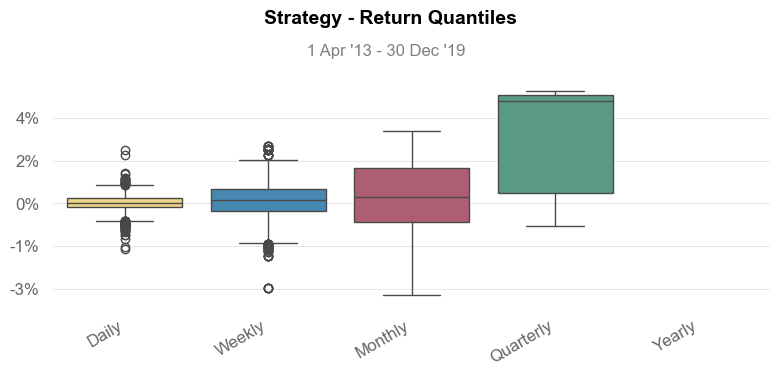

In [77]:
qs.reports.full(normal, mode = 'basic')

## 특수기간 (코로나 : 20년 ~ 22년)

In [78]:
### 기간 설정

# 확장국면 기간 (0)
co5_start = '2020-01-01'
co5_end = '2021-05-31'

# 수축국면 기간 (1)
co6_start = '2021-06-01'
co6_end = '2022-12-31'

In [79]:
co5 = data.loc[co5_start:co5_end, '6040_return']
co6 = data.loc[co6_start:co6_end, '4060_return']

In [80]:
# 두 데이터 시리즈를 합치기
corona = pd.concat([co5, co6])
corona

Date
2020-01-02   -0.005279
2020-01-03    0.002598
2020-01-06   -0.003878
2020-01-07    0.003278
2020-01-08   -0.003991
                ...   
2022-12-23   -0.010301
2022-12-26   -0.003191
2022-12-27    0.003702
2022-12-28   -0.007929
2022-12-29   -0.009950
Length: 742, dtype: float64

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the 

                           Strategy
-------------------------  ----------
Start Period               2020-01-02
End Period                 2022-12-29
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          5.26%
CAGR﹪                     1.19%

Sharpe                     0.2
Prob. Sharpe Ratio         63.34%
Smart Sharpe               0.18
Sortino                    0.28
Smart Sortino              0.26
Sortino/√2                 0.2
Smart Sortino/√2           0.19
Omega                      1.04

Max Drawdown               -23.77%
Longest DD Days            512
Volatility (ann.)          13.06%
Calmar                     0.05
Skew                       0.21
Kurtosis                   8.02

Expected Daily %           0.01%
Expected Monthly %         0.14%
Expected Yearly %          1.73%
Kelly Criterion            1.8%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.34%
Expected Shortfall (cVaR)  -1.34%

Max Consecutive Wins       7
Ma

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-08-05,2022-10-21,2022-12-29,512,-23.774326,-22.930196
2,2020-01-23,2020-03-19,2020-07-20,180,-22.189783,-18.470010
3,2021-01-26,2021-03-10,2021-07-22,178,-5.097237,-4.397447
4,2020-08-13,2020-10-30,2020-11-06,86,-4.382388,-4.050059
5,2021-01-12,2021-01-18,2021-01-22,11,-2.913542,-1.599656


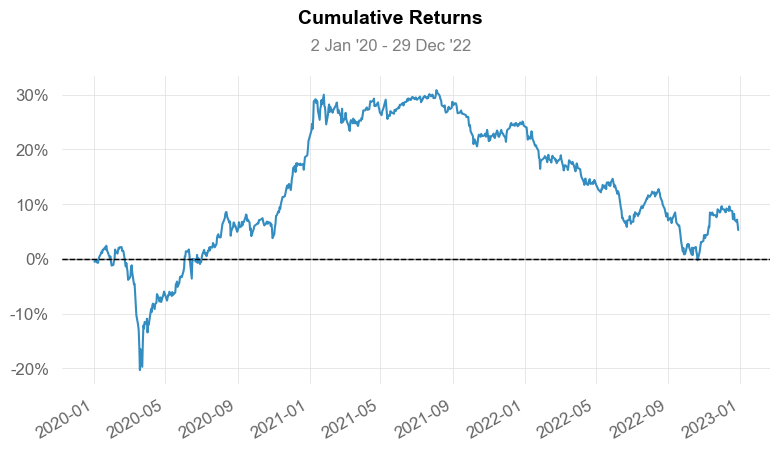

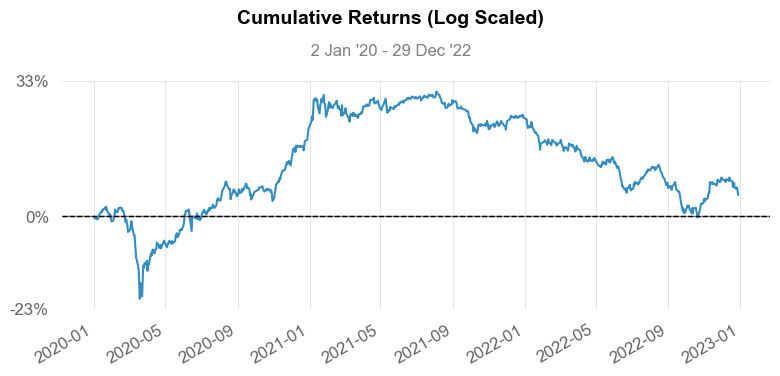

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\quantstats\_plotting\wrappers.py:565: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").apply(_stats.comp)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\quantstats\_plotting\wrappers.py:568: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").last()


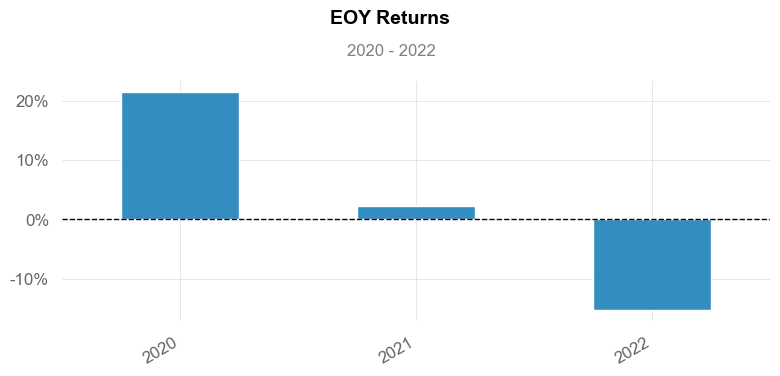

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\quantstats\_plotting\core.py:440: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  returns.fillna(0).resample(resample).apply(apply_fnc).resample(resample).last()


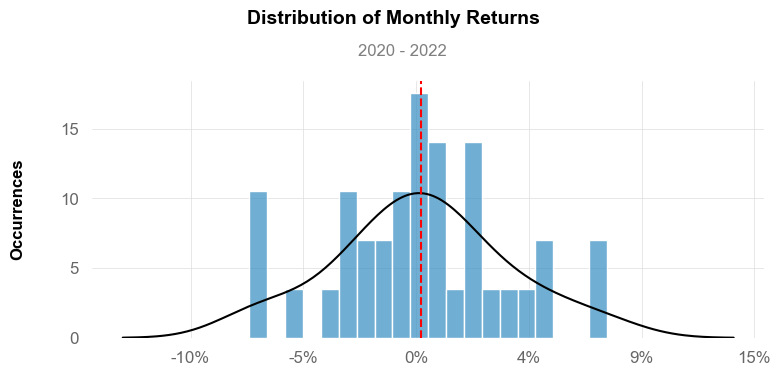

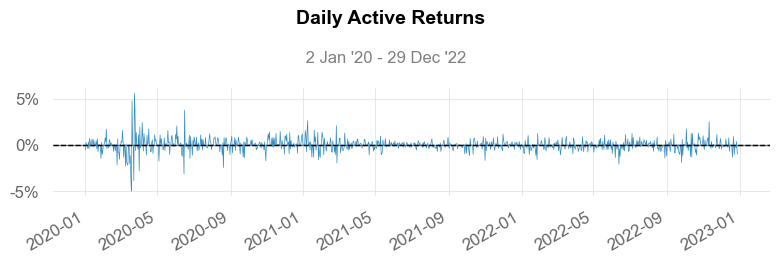

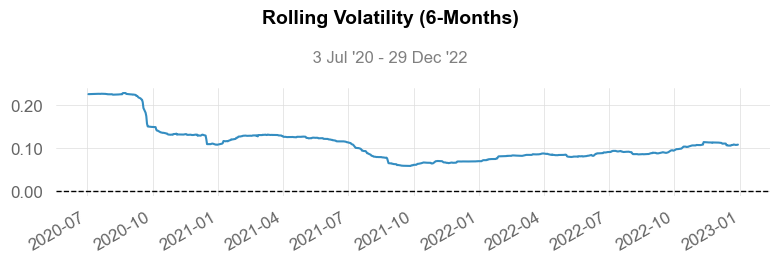

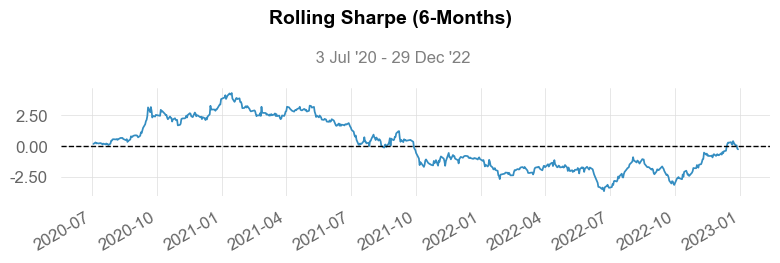

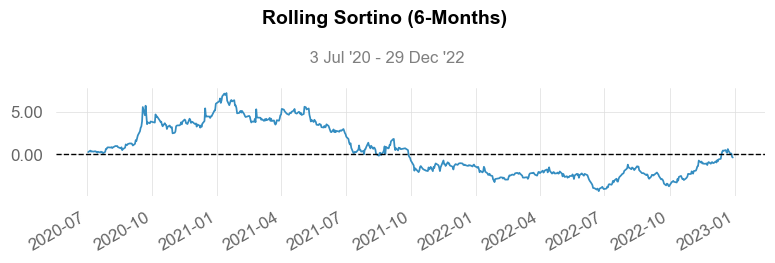

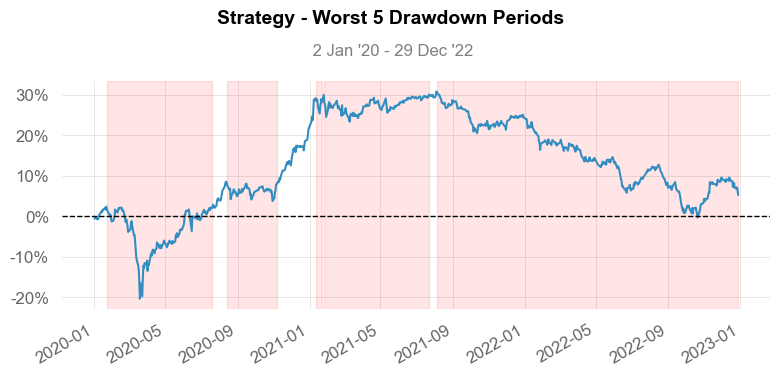

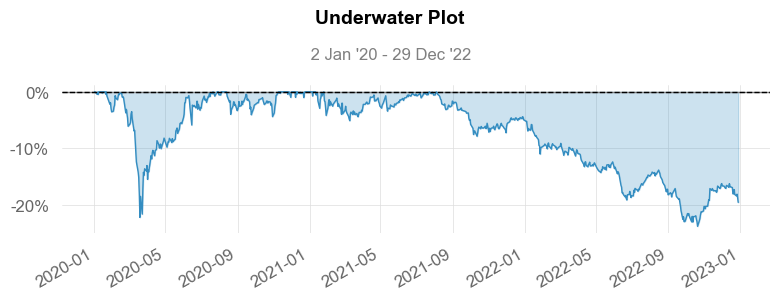

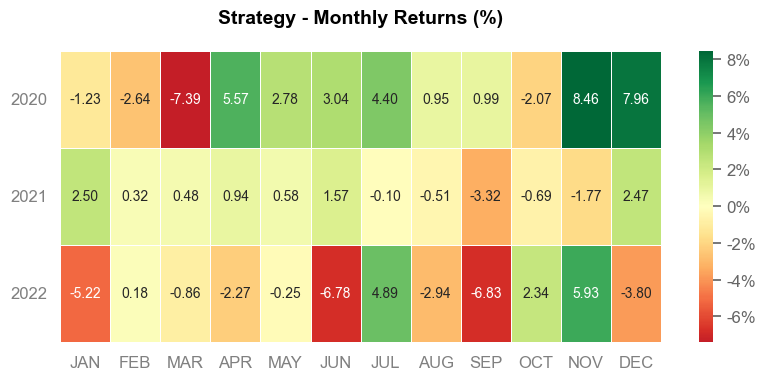

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\quantstats\_plotting\core.py:1016: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  port["Weekly"].ffill(inplace=True)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\quantstats\_plotting\core.py:1018: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  port["Monthly"] = port["Daily"].resample("M").apply(apply_fnc)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-package

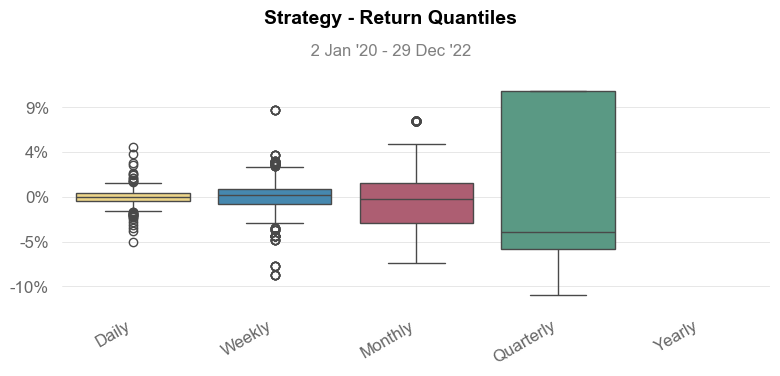

In [81]:
qs.reports.full(corona, mode = 'basic')

### 설명

1. 누적수익률
- 누적 수익률은 단순 덧셈이 아닌 곱셉으로 계산
- 누적수익률은 r1 + r2 가 아니라, (1+r1)*(1+r2)-1 로 계산

2. 연평균수익률(CAGR)
- 전체 누적수익률을 1년으로 환산한 연환산 수익률
- 기하평균으로 계산
- 기간 변동성을 고려X

3. sharpe ratio
- 위험 1 단위당 얻을 수 있는 수익률
- 수익률과 리스크 간의 관계를 나타냄
- 변동성을 반영

4. 소티노 지수 (Sortino Ratio)
- 샤프지수와 비슷하지만 위험(변동성) 계산시에 수익률이 마이너스인 경우만 포함하여 마이너스 변동성으로 변동성을 계산
- 마이너스 변동성(위험) 1 단위당 얻을 수 있는 수익률

5. MDD(Maximum Draw Down)
- 해당시점까지의 최대 고점에서 최대 저점까지 떨어진 낙폭
- 특정 투자 기간 동안의 낙폭들 중 최대 낙폭값을 고점값으로 나눈 비율로 최대 손실율
- 예를 들어, 6개월의 투자 기간 동안 월 별 주가가 100, 110, 105, 115, 105, 110 이었다면, ‘낙폭1‘(110 - 105), ‘낙폭2‘(115 - 105) 중 최대 낙폭값인 ‘낙폭2‘의 값을 고점값 115로 나눈 비율 (115-105)/115 = 약 9%